# Number Recognition

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## Import Data

In [30]:
number_data = load_digits()

In [100]:
number_data.images.shape

(1797, 8, 8)

In [101]:
# dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
test_dict = {"images": np.zeros((8,8,1)), 'target': "None"}

In [104]:
test_dict["images"].shape

(8, 8, 1)

In [109]:
a1 = np.zeros((8,8,1))

In [116]:
a2 = np.vstack((test_dict["images"], a1))

In [117]:
a2.shape

(16, 8, 1)

In [98]:
number_data.data.shape

(1797, 64)

In [32]:
len(number_data.data)

1797

In [33]:
len(number_data.data[0])

64

In [34]:
type(number_data.data)

numpy.ndarray

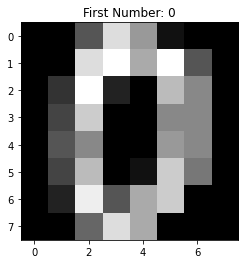

In [35]:
img = number_data.images[0]
label = number_data.target[0]

plt.imshow(img, cmap='gray')
plt.title(f'First Number: {label}')
plt.show()

In [36]:
type(img)

numpy.ndarray

In [37]:
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [38]:
# 8x8 digit Image
print("Array of Image:")
print(img)

print(f"Target/Label of Image: {label}")

# Length of Dataset
print(f"Number of Images: {len(number_data.images)}")

Array of Image:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Target/Label of Image: 0
Number of Images: 1797


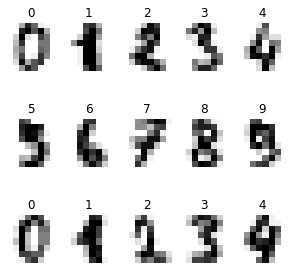

In [39]:
images_and_labels=list(zip(number_data.images,number_data.target))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap="gray_r",interpolation='nearest')
    plt.title('%i' % label)

In [40]:
## Definition of Variables

In [41]:
# Number of samples in the data set
n_samples=len(number_data.images)
print("Number of samples in the data set is :"+ str(n_samples))

x=number_data.images.reshape((n_samples,-1))
print("Shape of input matrix x is : "+ str(x.shape))

y=number_data.target
print("Shape of target vector y is :"+ str(y.shape))


Number of samples in the data set is :1797
Shape of input matrix x is : (1797, 64)
Shape of target vector y is :(1797,)


## Split Training and Test Data

In [42]:
# x: images, y: labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
len(y_test) + len(y_train)

1797

## Feature Scaling

In [44]:
X_train.shape

(1437, 64)

In [45]:
X_train

array([[ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  3., 12., ..., 16.,  2.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #fit data, then transform it
X_test = sc.transform(X_test) # already fitted with train data, only transform test data

In [47]:
X_test.shape

(360, 64)

## Convert training example to colom vector

In [48]:
X_train=X_train.T
X_test=X_test.T

In [49]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33790435,  2.90642897,  0.74354009, ..., -0.33790435,
        -0.33790435, -0.33790435],
       [-1.09141592,  1.41696421,  0.99890086, ..., -0.04625753,
        -0.25528921,  0.16277415],
       ...,
       [ 1.58325794,  1.58325794, -1.14493411, ..., -1.14493411,
        -1.14493411,  0.73069792],
       [ 3.53125595,  0.00595786, -0.49765616, ..., -0.49765616,
        -0.49765616, -0.49765616],
       [ 3.30213343, -0.18695903, -0.18695903, ..., -0.18695903,
        -0.18695903, -0.18695903]])

In [50]:
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T

In [51]:
y_train.shape

(1, 1437)

## Reshape the converting and testing data to the shape 10,1
* Output of model has 10 units (0-9)
* index with the highest prediction will represent the predicted number

In [52]:
Y_train_=np.zeros((10,y_train.shape[1]))
for i in range(y_train.shape[1]):
    Y_train_[y_train[0,i],i]=1
    
Y_test_=np.zeros((10,y_test.shape[1]))
for i in range(y_test.shape[1]):
    Y_test_[y_test[0,i],i]=1

In [53]:
Y_train_.shape

(10, 1437)

In [54]:
n_x=X_train.shape[0]
n_h=10
n_y=Y_train_.shape[0]

## Implementation of Neuronal Network

In [55]:
# initialize parameters for deep neural networks
def initialize_parameters_deep(layer_dims):
    """initializes parameter of convolutional neuronal network

    Args:
        layer_dims (list): [input features, hidden layers, output features] 

    Returns:
        dict: parametes
    """
    np.random.seed(3) #random initialization
    parameters = {}
    L = len(layer_dims) 
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01 # matrix lx(l-1)
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters

In [56]:
def linear_forward(A, W, b):
    """ Forward propagation without activation for a single layer

    Args:
        A ([type]): [description]
        W ([type]): [description]
        b ([type]): [description]

    Returns:
        [touple]: [description]
    """
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [57]:
# use ful activation functions and their derivatives
def sigmoid_(Z):
    return 1/(1+np.exp(-Z))

def relu_(Z):
    return Z*(Z>0)

def drelu_(Z):
    return 1. *(Z>0)

def dsigmoid_(Z):
    return sigmoid_(Z)*(1-sigmoid_(Z))

def sigmoid(Z):
    return sigmoid_(Z),Z

def relu(Z):
    return relu_(Z),Z

In [58]:
def linear_activation_forward(A_prev,W,b,activation):
    """Forward propagation with activation for a single layer: 
    If the type of activation is sigmoid, it performs sigmoid activation function else performs relu activation function.

    Args:
        A_prev ([type]): [description]
        W ([type]): [description]
        b ([type]): [description]
        activation ([type]): [description]

    Returns:
        [type]: [description]
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [59]:
# implementation of forward propogation for L layer neural network
def L_model_forward(X, parameters):
    """Output the final predicted vector of the output layer and some cache information

    chache: information which is used for backpropagation

    Args:
        X ([type]): [description]
        parameters ([type]): [description]

    Returns:
        touple: AL, caches
    """
    caches = []
    A = X
    L = len(parameters) // 2   
    # For the first L-1 layers, we use relu as activation function and for the last layer, we use sigmoid activation function
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],"relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    #assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [60]:
# cost function
def compute_cost(AL, Y):
    m=Y.shape[1]
    cost = -(1/m)*np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    cost=np.squeeze(cost)
    assert(cost.shape == ())
    return cost

## Back Propagation

In [61]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [62]:
def relu_backward(dA,activation_cache):
    return dA* drelu_(activation_cache)

In [63]:
def sigmoid_backward(dA,activation_cache):
    return dA* dsigmoid_(activation_cache)

In [64]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev,dW,db

In [65]:
# back propogation for L layers
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

Here dA is the derivative of one particular layer’s activation. The linear_activaton_backward function takes dA and corresponding cache from linear_activation_forward function and outputs the derivative of the activations of the previous layer along with gradients dW and db. This dW, db are used for adjusting parameters W using gradient descent.

With backpropagation is successfully implemented we need to adjust the weights with the help of computed derivatives (dW and db).

In [66]:
#update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(learning_rate)*grads["dW"+str(l+1)] 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(learning_rate)*grads["db"+str(l+1)]
    return parameters

# NN with 3 hidden layers and training of model

In [67]:
# N layer neural network
layers_dims=[n_x, 60,10,10]

def L_layer_model(X, Y, layers_dims, learning_rate = 0.005, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = [] 
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 6.931433
Cost after iteration 1000: 3.774829
Cost after iteration 2000: 3.262610
Cost after iteration 3000: 3.249175
Cost after iteration 4000: 3.248149
Cost after iteration 5000: 3.245551
Cost after iteration 6000: 3.234484
Cost after iteration 7000: 3.108940
Cost after iteration 8000: 2.714129
Cost after iteration 9000: 2.217460
Cost after iteration 10000: 1.924373
Cost after iteration 11000: 1.561357
Cost after iteration 12000: 1.231272
Cost after iteration 13000: 0.951040
Cost after iteration 14000: 0.764662
Cost after iteration 15000: 0.618042
Cost after iteration 16000: 0.489283
Cost after iteration 17000: 0.401840
Cost after iteration 18000: 0.339931
Cost after iteration 19000: 0.289097
Cost after iteration 20000: 0.243822
Cost after iteration 21000: 0.203796
Cost after iteration 22000: 0.171250
Cost after iteration 23000: 0.145861
Cost after iteration 24000: 0.126011
Cost after iteration 25000: 0.109966
Cost after iteration 26000: 0.096728
Cost after ite

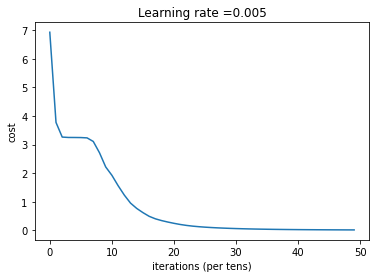

In [70]:
parameters = L_layer_model(X_train, Y_train_, layers_dims, num_iterations = 50000, print_cost = True)

In [71]:
def predict_L_layer(X,parameters):
    AL,caches=L_model_forward(X,parameters)
    prediction=np.argmax(AL,axis=0)
    return prediction.reshape(1,prediction.shape[0])

In [72]:
predictions_train_L = predict_L_layer(X_train, parameters)

In [73]:
print("Training Accuracy : "+ str(np.sum(predictions_train_L==y_train)/y_train.shape[1] * 100)+" %")

Training Accuracy : 100.0 %


In [74]:
predictions_test_L=predict_L_layer(X_test,parameters)

In [75]:
print("Testing Accuracy : "+ str(np.sum(predictions_test_L==y_test)/y_test.shape[1] * 100)+" %")

Testing Accuracy : 97.22222222222221 %


In [76]:
np.save('./training_model/model.npy',parameters)

In [77]:
loaded_parameter_array = np.load('./training_model/model.npy', allow_pickle=True)

In [78]:
loaded_parameters = dict()
for key, key_d in loaded_parameter_array.item().items():
    print(key, key_d)
    loaded_parameters[key] = key_d

W1 [[ 0.01788628 -0.00823179  0.06408945 ... -0.08356922  0.03019335
  -0.28369811]
 [-0.00674728 -0.03508836  0.07160553 ...  0.00090854 -0.08631439
   0.00612526]
 [-0.00648411  0.01347704 -0.02124118 ...  0.08888709  0.13087861
   0.04831265]
 ...
 [ 0.00209191  0.047964   -0.03162286 ...  0.07645443  0.05096642
   0.04215397]
 [ 0.01243847  0.0245858  -0.06790808 ... -0.01499533  0.1560376
   0.05000238]
 [-0.01009421 -0.03400794 -0.04827499 ... -0.07332486  0.03102079
  -0.04313526]]
b1 [[ 1.11502751e-01]
 [ 2.33634316e-01]
 [ 1.99522746e-04]
 [ 2.26269861e-02]
 [-6.70165566e-02]
 [ 5.63830195e-02]
 [-3.85005224e-02]
 [ 1.82390065e-02]
 [ 5.96301103e-02]
 [ 1.27644166e-01]
 [-3.93206325e-03]
 [ 1.14335020e-02]
 [ 3.02730735e-03]
 [-5.71182313e-02]
 [ 3.50209690e-01]
 [ 1.19205371e-01]
 [ 7.12818950e-02]
 [ 2.07571450e-02]
 [ 3.86463713e-01]
 [-3.15744401e-02]
 [ 1.32745189e-01]
 [ 1.93615576e-01]
 [ 3.85313862e-01]
 [-5.46479298e-02]
 [ 2.94353621e-02]
 [ 2.66544566e-01]
 [ 2.6756

In [79]:
loaded_img = plt.imread("test.png")

In [84]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [85]:
gray_img = rgb2gray(loaded_img)

In [86]:
grayimg1 = rebin(gray_img, (8,8))/255*16

In [1]:
plt.imshow(grayimg1, cmap='gray')
plt.show()

NameError: name 'plt' is not defined

In [89]:
training_img=grayimg1.reshape((64,1)).T
training_img = sc.transform(training_img)
training_img=training_img.T
predicted_digit=predict_L_layer(training_img,loaded_parameters)
print('Predicted digit is : '+str(predicted_digit))

Predicted digit is : [[4]]


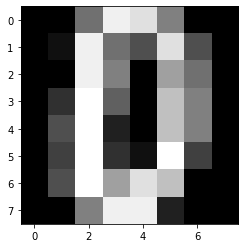

Predicted digit is : [[0]]
True digit is: 0


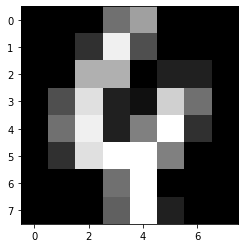

Predicted digit is : [[4]]
True digit is: 4


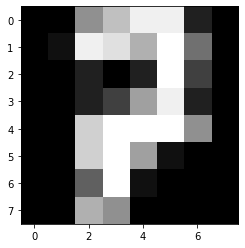

Predicted digit is : [[7]]
True digit is: 7


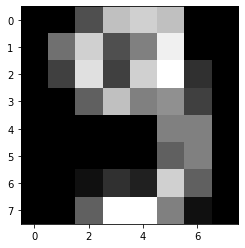

Predicted digit is : [[9]]
True digit is: 9


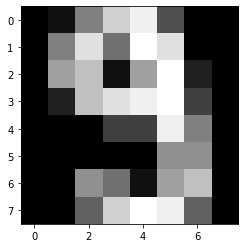

Predicted digit is : [[9]]
True digit is: 9


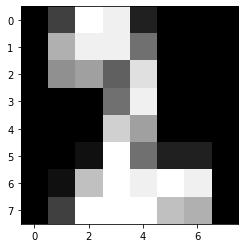

Predicted digit is : [[2]]
True digit is: 2


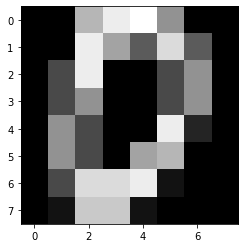

Predicted digit is : [[0]]
True digit is: 0


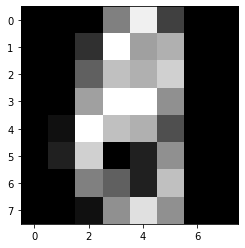

Predicted digit is : [[8]]
True digit is: 8


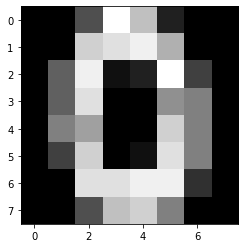

Predicted digit is : [[0]]
True digit is: 0


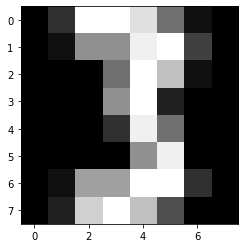

Predicted digit is : [[3]]
True digit is: 3


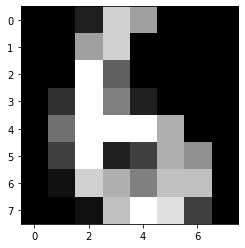

Predicted digit is : [[6]]
True digit is: 6


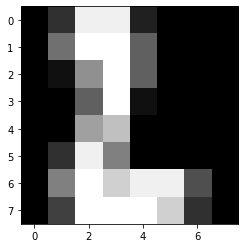

Predicted digit is : [[2]]
True digit is: 2


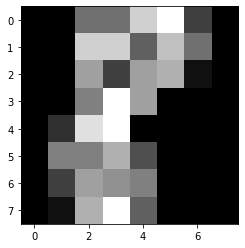

Predicted digit is : [[8]]
True digit is: 8


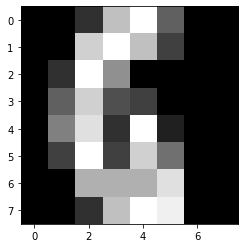

Predicted digit is : [[6]]
True digit is: 6


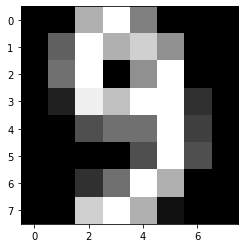

Predicted digit is : [[9]]
True digit is: 9


In [90]:
import random
for j in range(15):
    i=random.randint(0,n_samples)
    plt.imshow(number_data.images[i],  cmap='gray')
    plt.show()
      
    training_img=number_data.images[i].reshape((64,1)).T
    training_img = sc.transform(training_img)
    training_img=training_img.T
    predicted_digit=predict_L_layer(training_img,loaded_parameters)
    print('Predicted digit is : '+str(predicted_digit))
    print('True digit is: '+ str(y[i]))